# AIT500 - Training and Prediction with MNIST Digits

This notebook provides you with an introduction in using different ML algorithms frameworks to perform image recognition on MNIST digits.

You will be able using different metrics and tools to assess the quality of predicting digits 0 - 9


illustrates performance of different using different models to


**Note: This notebook should be run in Colab**


Training Scikit-Learn SVC Model to Recognize MNIST Digits (8x8 digits)

Training Scikit-Learn SVC Model to Recognize MNIST Digits (28x28 digits)










# Setup Libraries

In [ ]:
import pandas as pd
import numpy as np

# set pandas display options
pd.set_option('display.max_columns', 50) # show more columns
pd.set_option('display.max_rows', 200) # show more rows
pd.set_option('max_colwidth', 400) # set wider columns

# set numpy display options
np.set_printoptions(threshold=np.inf)
np.set_printoptions(linewidth=np.inf)

# Setup Google Drive access to API keys

In [ ]:
#@markdown connect to drive for API keys stored in <br> `My Drive/Colab Notebooks/API_Keys`
import os, sys
from google.colab import drive
drive.mount('/content/mnt')
nb_path = '/content/notebooks'
os.symlink('/content/mnt/My Drive/Colab Notebooks', nb_path)
sys.path.insert(0, nb_path)  # or append(nb_path)


Drive already mounted at /content/mnt; to attempt to forcibly remount, call drive.mount("/content/mnt", force_remount=True).


FileExistsError: ignored

mnist_sklearn_logistic_model_28x28.joblib  mnist_sklearn_svc_model_8x8.joblib
mnist_sklearn_svc_model_28x28.joblib	   mnist_tf_cnn_model_28x28


# Training Scikit-Learn SVC Model to Recognize 8x8 MNIST Digits

This model uses scikit-learn's small-sized MNIST dataset:
- 8x8 image size
- 1797 images
- 50% split between training and test datasets

References

https://scikit-learn.org/stable/auto_examples/classification/plot_digits_classification.html

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt # plotting library
import os
from PIL import Image
import seaborn as sns
import numpy as np
os.getcwd()


# Import datasets, classifiers and performance metrics
from sklearn import datasets, metrics, svm
from sklearn.model_selection import train_test_split

import joblib # for saving, loading sklearn model

(1797, 8, 8)


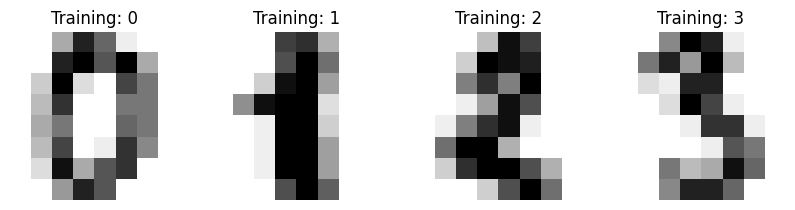

In [ ]:
digits = datasets.load_digits()
print(digits.images.shape)

_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, label in zip(axes, digits.images, digits.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title("Training: %i" % label)

In [ ]:
print(digits.images[0])
print(digits.images.shape)

[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]
(1797, 8, 8)


In [ ]:
# flatten the images
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

# Create a classifier: a support vector classifier
clf = svm.SVC(gamma=0.001)

# Split data into 50% train and 50% test subsets
X_train, X_test, y_train, y_test = train_test_split(
    data, digits.target, test_size=0.5, shuffle=False
)

In [ ]:
%%time
# Learn the digits on the train subset
clf.fit(X_train, y_train)

CPU times: user 28.1 ms, sys: 1.98 ms, total: 30.1 ms
Wall time: 33.4 ms


SVC(gamma=0.001)

In [ ]:
# Predict the value of the digit on the test subset
predicted = clf.predict(X_test)

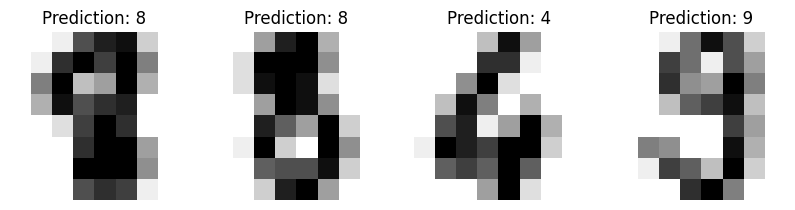

In [ ]:
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, prediction in zip(axes, X_test, predicted):
    ax.set_axis_off()
    image = image.reshape(8, 8)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title(f"Prediction: {prediction}")

In [ ]:
#@markdown this model shows resonable accuracy of 97%
print(
    f"Classification report for classifier {clf}:\n"
    f"{metrics.classification_report(y_test, predicted)}\n"
)

Classification report for classifier SVC(gamma=0.001):
              precision    recall  f1-score   support

           0       1.00      0.99      0.99        88
           1       0.99      0.97      0.98        91
           2       0.99      0.99      0.99        86
           3       0.98      0.87      0.92        91
           4       0.99      0.96      0.97        92
           5       0.95      0.97      0.96        91
           6       0.99      0.99      0.99        91
           7       0.96      0.99      0.97        89
           8       0.94      1.00      0.97        88
           9       0.93      0.98      0.95        92

    accuracy                           0.97       899
   macro avg       0.97      0.97      0.97       899
weighted avg       0.97      0.97      0.97       899




### Show Confusion Matrix

Confusion matrix:
[[87  0  0  0  1  0  0  0  0  0]
 [ 0 88  1  0  0  0  0  0  1  1]
 [ 0  0 85  1  0  0  0  0  0  0]
 [ 0  0  0 79  0  3  0  4  5  0]
 [ 0  0  0  0 88  0  0  0  0  4]
 [ 0  0  0  0  0 88  1  0  0  2]
 [ 0  1  0  0  0  0 90  0  0  0]
 [ 0  0  0  0  0  1  0 88  0  0]
 [ 0  0  0  0  0  0  0  0 88  0]
 [ 0  0  0  1  0  1  0  0  0 90]]


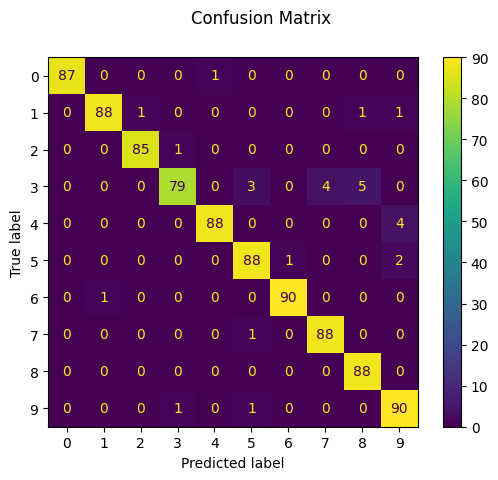

In [ ]:
#@markdown the confusion matrix shows that the model has the most trouble with the digit 3
#@markdown and it's most often confused with the digit 5, 7, 8
disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test, predicted)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")

plt.show()

## Save model for later re-use

Save model to google drive

In [ ]:
# set this to match your google drive path

mnist_sklearn_svc_model_8x8_filename = '/content/notebooks/AIT500/models/mnist_sklearn_svc_model_8x8.joblib'
joblib.dump(clf, mnist_sklearn_svc_model_8x8_filename)

## Load model and make predictions

Load saved model from above and call `predict()` to make predictions on the test dataset

Note: We need to ensure the shape of the input data matches the same same as data used to train the model

What is the accuracy, precision, and recall?


In [ ]:
mnist_sklearn_svc_model_8x8 = joblib.load(mnist_sklearn_svc_model_8x8_filename)

In [ ]:
prediction = mnist_sklearn_svc_model_8x8.predict(X_test)
print(metrics.classification_report(y_test, prediction))

# Training Scikit-Learn SVC Model to Recognize 28x28 MNIST Digits


The above SVC model works for low res 8x8 digits.  Will it work just as well for the higher res 28x28 image size?

We'll use 5000 training images to provide the model with more samples to learn from


This model uses uses the larger MNIST dataset:
- 28x28 image size
- 70000 images total
- 50% split between training and test datasets:
  - 5000 images randomly selected for train dataset
  - 5000 images randomly selected for test dataset


References

https://scikit-learn.org/stable/auto_examples/classification/plot_digits_classification.html



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt # plotting library
import os
from PIL import Image
import seaborn as sns
import numpy as np
os.getcwd()


# Import datasets, classifiers and performance metrics
from sklearn import datasets, metrics, svm
from sklearn.model_selection import train_test_split
from sklearn.utils import check_random_state

import joblib # for saving, loading sklearn model

In [ ]:
# run curl at command line to download local version of iris dataset to working directory
dowloaded_file = 'mnist_test.csv'
if not os.path.isfile(dowloaded_file):
  !curl https://pjreddie.com/media/files/mnist_train.csv --output mnist_train.csv
  !curl https://pjreddie.com/media/files/mnist_test.csv --output mnist_test.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  104M  100  104M    0     0  61.0M      0  0:00:01  0:00:01 --:--:-- 61.0M
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 17.4M  100 17.4M    0     0  25.2M      0 --:--:-- --:--:-- --:--:-- 25.2M


In [ ]:
# first column of csv is the label
train_df = pd.read_csv('mnist_train.csv', header=None)
test_df = pd.read_csv('mnist_test.csv', header=None)

combined_train_test_df = pd.concat([train_df, test_df])

X = combined_train_test_df.loc[:,1:].values
y = combined_train_test_df.loc[:,0].values

# randomize images
random_state = check_random_state(0)
permutation = random_state.permutation(X.shape[0])
X = X[permutation]
y = y[permutation]

print(X.shape, y.shape)

(70000, 784) (70000,)


In [ ]:
# use smaller training set so model trains faster
train_samples = 5000

# Split data into 50% train and 50% test subsets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size = train_samples, test_size=0.5, shuffle=False
)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(5000, 784) (35000, 784) (5000,) (35000,)


[Text(0.5, 1.0, 'Fairly even distribution across digits from the 5000 samples')]

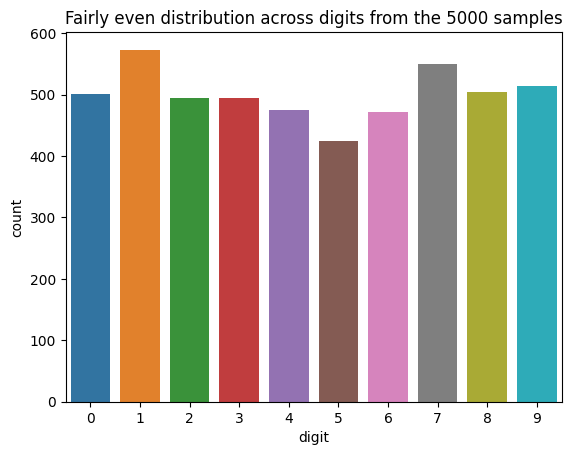

In [ ]:
labels_df = pd.DataFrame(y_train, columns=['digit'])
g = sns.countplot(labels_df, x='digit')
g.set(title=f'Fairly even distribution across digits from the {train_samples} samples')

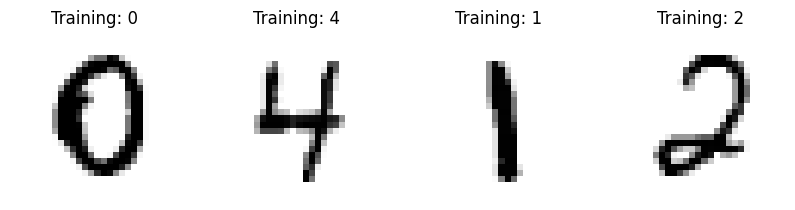

In [ ]:
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, label in zip(axes, X_train, y_train):
    ax.set_axis_off()
    ax.imshow(image.reshape(28,28), cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title("Training: %i" % label)

In [ ]:
print(X_train[0].reshape(28,28))
print(X_train[0].shape)

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0  89 147 147 249 230  59   2   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  15 160 249 254 254 254 254 254 122   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   8 188 254 254 254 250 147 166 253 251 120   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  14 189 254 254 207 103  22   0   0 126 253 200   8   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0 163 254 254 227  15   0   0   0   0   0 24

In [ ]:
%%time
# Create a classifier: a support vector classifier
clf = svm.SVC(gamma=0.001)

# Learn the digits on the train subset
clf.fit(X_train, y_train)

CPU times: user 15 s, sys: 26.8 ms, total: 15 s
Wall time: 15.1 s


SVC(gamma=0.001)

In [ ]:
# Predict the value of the digit on the test subset
predicted = clf.predict(X_test)

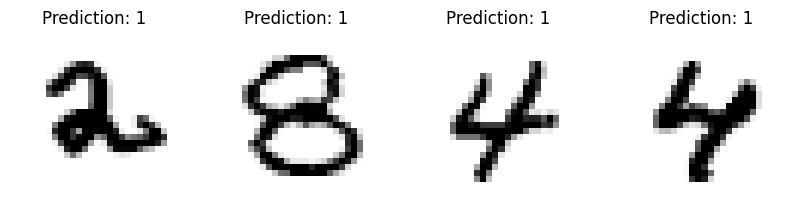

In [ ]:
#@markdown The model seems to be predicting `1` for every digit!
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, prediction in zip(axes, X_test, predicted):
    ax.set_axis_off()
    image = image.reshape(28, 28)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title(f"Prediction: {prediction}")

[Text(0.5, 1.0, 'Model only predicting "1"s ')]

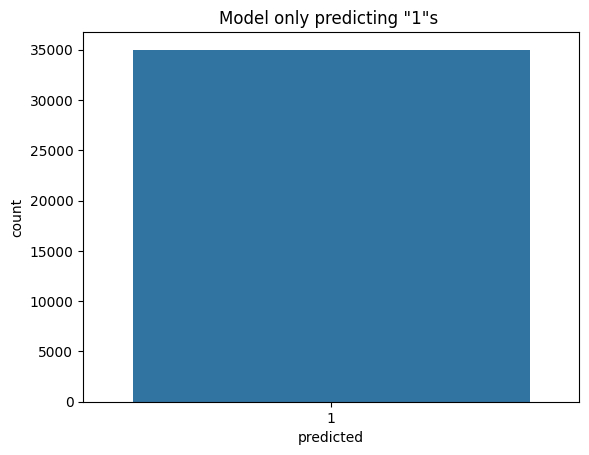

In [ ]:
#@markdown the model is indeed predicting 1 for every digit
labels_df = pd.DataFrame(predicted, columns=['predicted'])
g = sns.countplot(labels_df, x='predicted')
g.set(title=f'Model only predicting "1"s ')

### Show Confusion Matrix

The confusion matrix makes it clear the model is predicting 1 for every digit

This experiment shows the importance of matching the right model to the dataset you have

Confusion matrix:
[[   0 3543    0    0    0    0    0    0    0    0]
 [   0 3900    0    0    0    0    0    0    0    0]
 [   0 3517    0    0    0    0    0    0    0    0]
 [   0 3569    0    0    0    0    0    0    0    0]
 [   0 3392    0    0    0    0    0    0    0    0]
 [   0 3164    0    0    0    0    0    0    0    0]
 [   0 3433    0    0    0    0    0    0    0    0]
 [   0 3620    0    0    0    0    0    0    0    0]
 [   0 3382    0    0    0    0    0    0    0    0]
 [   0 3480    0    0    0    0    0    0    0    0]]


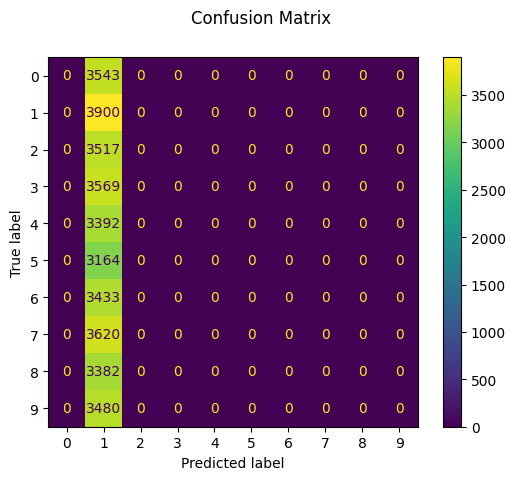

In [ ]:
disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test, predicted)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")

plt.show()

## Takeaways #1, How do we fix this?
Just because the SVC model performs well for 8x8 digits does not mean we can naively use the same model without adjustments for a new dataset!

How do we fix this?
- even though `imshow()` makes both datasets look similar in greyscale, they are actually different
- if you go back and examine the array values in the 8x8 vs 28x28 above, you'll notice that the maximum scale for the two datasets is different:
  - the 8x8 images is scaled to 16
  - the 28x28 images is scaled to 256
  - both sets of images have the same minimum (zero)
- the lower resolution 8x8 images have far fewer features compared to the 28x28 images (64 vs 784).  As a result, the relative distribution of pixel values will be different and can affect the quality of model training.

It turns out that the SVC algorithm is sensitive to feature scales.  The SVC model tries to maximize the distance between the plane (ie "fence") separating the support vectors.  Pixels having very large values will dominate when calculating this distance.  The high dimensional features of the 28x28 image

To get the most from SVC training, we can apply a data transformation to scale the 28x28 images.  For example:
1. applying a transformation to adjust the pixel values so they range between 0 to 1.  This is called normalization
2. standardize pixel values so they have 0 mean and a variance of 1.  This is called standardization

By examining the 8x8 dataset, we can see that normalization was used.  For comparison, let's normalize the 28x28 images to 16 and see how the SVC performs.  

The next few cells will use normalization to scale the 28x28 dataset and show whether this will improve the SVC model for 28x28 images

In [ ]:
%%time
X = combined_train_test_df.loc[:,1:].values
y = combined_train_test_df.loc[:,0].values

from sklearn.preprocessing import MinMaxScaler
# Initialize MinMaxScaler
min_max_scaler = MinMaxScaler(feature_range=(0, 16))

X_scaled = min_max_scaler.fit_transform(X)

# randomize images
random_state = check_random_state(0)
permutation = random_state.permutation(X_scaled.shape[0])
X_scaled = X_scaled[permutation]
y = y[permutation]

print(X_scaled.shape, y.shape)

# use smaller training set so model trains faster
train_samples = 5000

# Split data into 50% train and 50% test subsets
X_train_scaled, X_test_scaled, y_train, y_test = train_test_split(
    X_scaled, y, train_size = train_samples, test_size=0.5, shuffle=False
)

print(X_train_scaled.shape, X_test_scaled.shape, y_train.shape, y_test.shape)

# Create a classifier: a support vector classifier
clf = svm.SVC(gamma=0.001)

# Learn the digits on the train subset
clf.fit(X_train_scaled, y_train)

# Predict the value of the digit on the test subset
predicted = clf.predict(X_test_scaled)

(70000, 784) (70000,)
(5000, 784) (35000, 784) (5000,) (35000,)
CPU times: user 3min 22s, sys: 1.16 s, total: 3min 23s
Wall time: 4min 5s


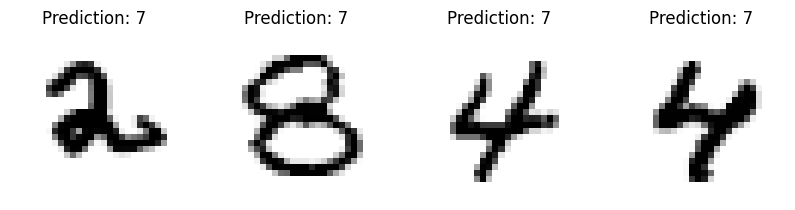

In [ ]:
#@markdown The model is performing differently - predicting mostly 7's, 1's, and 9's!
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, prediction in zip(axes, X_test_scaled, predicted):
    ax.set_axis_off()
    image = image.reshape(28, 28)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title(f"Prediction: {prediction}")

[Text(0.5, 1.0, "With 28x28 image normalization to 16, the same model is no longer predicting only 1's \n Now it's predicting mostly 7's along with 1, 9, 0's ")]

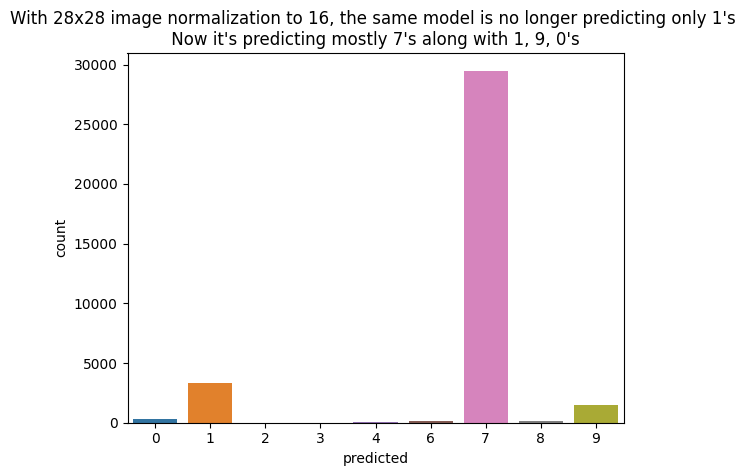

In [ ]:
#@markdown the model is now predicting 7's, 1's, and 9's!
labels_df = pd.DataFrame(predicted, columns=['predicted'])
g = sns.countplot(labels_df, x='predicted')
g.set(title=f"With 28x28 image normalization to 16, the same model is no longer predicting only 1's \n Now it's predicting mostly 7's along with 1, 9, 0's ")

In [ ]:
#@markdown The same model using normalization to 16 still has very poor accuracy.
print(
    f"Classification report for classifier {clf}:\n"
    f"{metrics.classification_report(y_test, predicted)}\n"
)

Classification report for classifier SVC(gamma=0.001):
              precision    recall  f1-score   support

           0       1.00      0.09      0.16      3543
           1       1.00      0.85      0.92      3900
           2       1.00      0.00      0.00      3517
           3       1.00      0.00      0.01      3569
           4       1.00      0.02      0.04      3392
           5       0.00      0.00      0.00      3164
           6       1.00      0.05      0.10      3433
           7       0.12      1.00      0.22      3620
           8       1.00      0.03      0.07      3382
           9       0.97      0.42      0.58      3480

    accuracy                           0.26     35000
   macro avg       0.81      0.25      0.21     35000
weighted avg       0.82      0.26      0.22     35000




/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Show Confusion Matrix Again

The new confusion matrix shows a vertical column for 7.  Digit 1 has the best combination of accuracy & recall (highest F1-score of 0.92).  Digit 9 is the next best with F1-score of 0.58

Confusion matrix:
[[ 315    0    0    0    0    0    0 3228    0    0]
 [   0 3323    0    0    0    0    0  577    0    0]
 [   0    0    4    0    0    0    0 3513    0    0]
 [   0    0    0   17    0    0    0 3552    0    0]
 [   0    0    0    0   68    0    0 3286    0   38]
 [   0    0    0    0    0    0    0 3164    0    0]
 [   0    0    0    0    0    0  183 3250    0    0]
 [   0    0    0    0    0    0    0 3617    0    3]
 [   0    0    0    0    0    0    0 3268  114    0]
 [   0    0    0    0    0    0    0 2028    0 1452]]


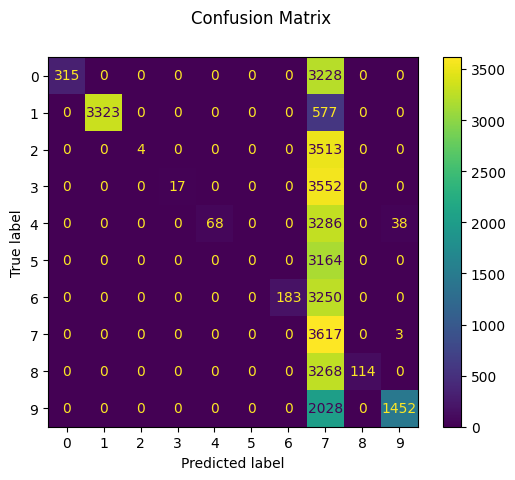

In [ ]:
disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test, predicted)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")

plt.show()

## Takeaways #2, How do we fix this?

It turns out normalizing to 16 only provides a marginal improvement.

The number of feature in the 28x28 image dataset is over 10x that of the 8x8 images (784 vs 64).  Normalizing to normalizing to 16 in combination with higher dimensionality might be difficult for this SVC model to learn the ideal "fence" separating the different digits.

Let's try standardizing instead of scaling in the cells below to see if the model improves

In [ ]:
%%time
X = combined_train_test_df.loc[:,1:].values
y = combined_train_test_df.loc[:,0].values

from sklearn.preprocessing import StandardScaler
# Initialize StandardScaler
standard_scaler = StandardScaler()

X_standardized = standard_scaler.fit_transform(X)

# randomize images
random_state = check_random_state(0)
permutation = random_state.permutation(X_standardized.shape[0])
X_standardized = X_standardized[permutation]
y = y[permutation]

print(X_standardized.shape, y.shape)

# use smaller training set so model trains faster
train_samples = 5000

# Split data into 50% train and 50% test subsets
X_train_standardized, X_test_standardized, y_train, y_test = train_test_split(
    X_standardized, y, train_size = train_samples, test_size=0.5, shuffle=False
)

print(X_train_standardized.shape, X_test_standardized.shape, y_train.shape, y_test.shape)

# Create a classifier: a support vector classifier
clf = svm.SVC(gamma=0.001)

# Learn the digits on the train subset
clf.fit(X_train_standardized, y_train)

# Predict the value of the digit on the test subset
predicted = clf.predict(X_test_standardized)

(70000, 784) (70000,)
(5000, 784) (35000, 784) (5000,) (35000,)
CPU times: user 1min 25s, sys: 751 ms, total: 1min 26s
Wall time: 1min 28s


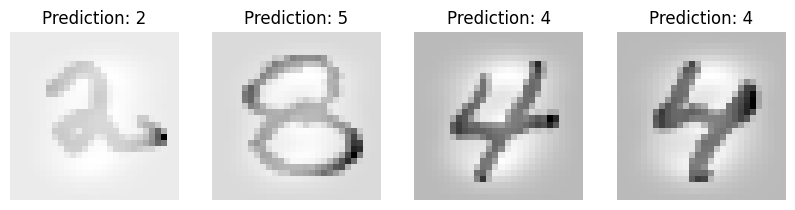

In [ ]:
#@markdown The model is performing a lot better now!
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, prediction in zip(axes, X_test_scaled, predicted):
    ax.set_axis_off()
    image = image.reshape(28, 28)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title(f"Prediction: {prediction}")

[Text(0.5, 1.0, "With scaled data, the same model is no longer predicting only 1's or 7's")]

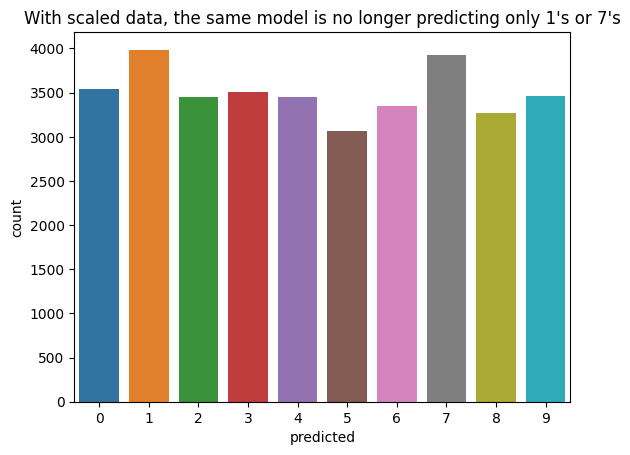

In [ ]:
#@markdown the model is now mostly correct when predicting different digits!
labels_df = pd.DataFrame(predicted, columns=['predicted'])
g = sns.countplot(labels_df, x='predicted')
g.set(title=f"With scaled data, the same model is no longer predicting only 1's or 7's")

In [ ]:
#@markdown The same model using scaled data now has a resonable accuracy of 90%
print(
    f"Classification report for classifier {clf}:\n"
    f"{metrics.classification_report(y_test, predicted)}\n"
)

Classification report for classifier SVC(gamma=0.001):
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      3543
           1       0.96      0.98      0.97      3900
           2       0.93      0.91      0.92      3517
           3       0.92      0.90      0.91      3569
           4       0.92      0.93      0.93      3392
           5       0.92      0.89      0.90      3164
           6       0.95      0.93      0.94      3433
           7       0.86      0.93      0.89      3620
           8       0.92      0.89      0.90      3382
           9       0.90      0.90      0.90      3480

    accuracy                           0.92     35000
   macro avg       0.92      0.92      0.92     35000
weighted avg       0.92      0.92      0.92     35000




### Show Confusion Matrix Again

The new confusion matrix shows that scaling the 28x28 input images

Adding to our observation above, this experiment shows the importance of:
1. matching the right model to the dataset you have
2. performing the right data preparation to

Confusion matrix:
[[3421    0   18    5    9   20   25   16   28    1]
 [   1 3812   14   10   11    5   12   16   14    5]
 [  11   15 3205   34   41    5   19  108   73    6]
 [   8   12   57 3223    5   75    6   96   69   18]
 [   3   12   35    1 3166    5   17   32    8  113]
 [  19   16    9  106   24 2817   65   45   28   35]
 [  28   18   35    0   16   41 3192   84   19    0]
 [   8   32   27    5   54    1    0 3359    4  130]
 [  20   54   33   74   25   94   12   38 3005   27]
 [  19   15   14   54   96    5    1  129   19 3128]]


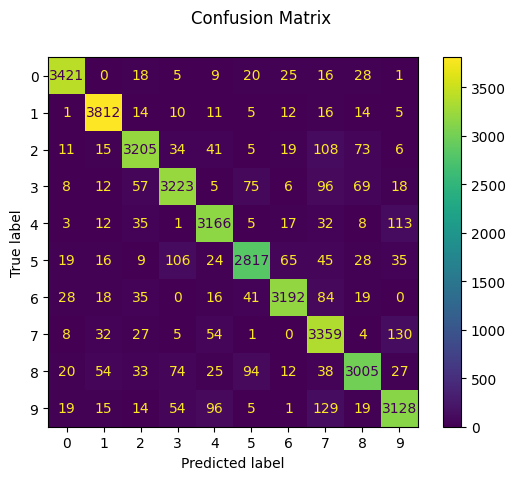

In [ ]:
disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test, predicted)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")

plt.show()

## Save model for later re-use

Save model to google drive

In [ ]:
# set this to match your google drive path

mnist_sklearn_svc_model_28x28_filename = '/content/notebooks/AIT500/models/mnist_sklearn_svc_model_28x28.joblib'
joblib.dump(clf, mnist_sklearn_svc_model_28x28_filename)

['/content/notebooks/AIT500/models/mnist_sklearn_svc_model_28x28.joblib']

## Load model and make predictions

Load saved model from above and call `predict()` to make predictions on the test dataset

Note: We need to ensure the shape of the input data matches the same same as data used to train the model

What is the accuracy, precision, and recall?


In [ ]:
mnist_sklearn_svc_model_28x28 = joblib.load(mnist_sklearn_svc_model_28x28_filename)

In [ ]:
prediction = mnist_sklearn_svc_model_28x28.predict(X_test_standardized)
print(metrics.classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97      3543
           1       0.96      0.98      0.97      3900
           2       0.93      0.91      0.92      3517
           3       0.92      0.90      0.91      3569
           4       0.92      0.93      0.93      3392
           5       0.92      0.89      0.90      3164
           6       0.95      0.93      0.94      3433
           7       0.86      0.93      0.89      3620
           8       0.92      0.89      0.90      3382
           9       0.90      0.90      0.90      3480

    accuracy                           0.92     35000
   macro avg       0.92      0.92      0.92     35000
weighted avg       0.92      0.92      0.92     35000



# Training Scikit-Learn Multinomial Logistic w/ L1 Regularization to Recognize 28x28 MNIST Digits

https://scikit-learn.org/stable/auto_examples/linear_model/plot_sparse_logistic_regression_mnist.html


In [ ]:
import time

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.datasets import fetch_openml
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils import check_random_state
from sklearn import metrics

import joblib # for saving, loading sklearn model

In [ ]:
# first column of csv is the label
train_df = pd.read_csv('mnist_train.csv', header=None)
test_df = pd.read_csv('mnist_test.csv', header=None)
combined_train_test_df = pd.concat([train_df, test_df])
combined_train_test_df.shape

(70000, 785)

In [ ]:
%%time
# Turn down for faster convergence
train_samples = 5000

X = combined_train_test_df.loc[:,1:].values
y = combined_train_test_df.loc[:,0].values

random_state = check_random_state(0)
permutation = random_state.permutation(X.shape[0])
X = X[permutation]
y = y[permutation]
X = X.reshape((X.shape[0], -1))

X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=train_samples, test_size=10000
)

# scale train and test images
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Turn up tolerance for faster convergence
clf = LogisticRegression(C=50.0 / train_samples, penalty="l1", solver="saga", tol=0.1)
clf.fit(X_train, y_train)
sparsity = np.mean(clf.coef_ == 0) * 100
score = clf.score(X_test, y_test)
# print('Best C % .4f' % clf.C_)
print("Sparsity with L1 penalty: %.2f%%" % sparsity)
print("Test score with L1 penalty: %.4f" % score)

Sparsity with L1 penalty: 79.59%
Test score with L1 penalty: 0.8343
CPU times: user 2.21 s, sys: 266 ms, total: 2.47 s
Wall time: 2.48 s


### Show what the model learned by visualizing model weights

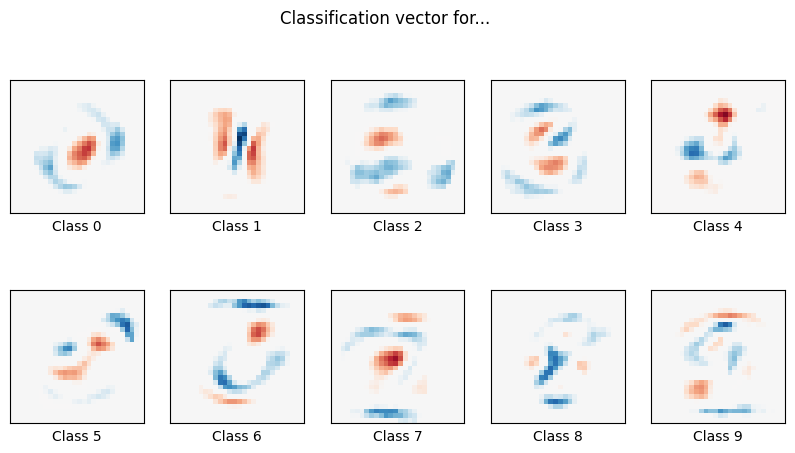

In [ ]:
coef = clf.coef_.copy()
plt.figure(figsize=(10, 5))
scale = np.abs(coef).max()
for i in range(10):
    l1_plot = plt.subplot(2, 5, i + 1)
    l1_plot.imshow(
        coef[i].reshape(28, 28),
        interpolation="nearest",
        cmap=plt.cm.RdBu,
        vmin=-scale,
        vmax=scale,
    )
    l1_plot.set_xticks(())
    l1_plot.set_yticks(())
    l1_plot.set_xlabel("Class %i" % i)
plt.suptitle("Classification vector for...")

plt.show()

In [ ]:
# Predict the value of the digit on the test subset
predicted = clf.predict(X_test)

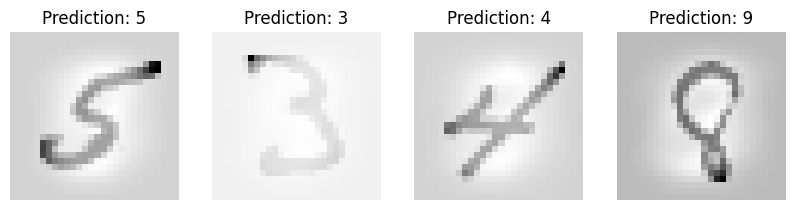

In [ ]:
#@markdown The multinomial logistic model performs better than the SVC model above
#@markdown can accuracy be improved?
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, prediction in zip(axes, X_test, predicted):
    ax.set_axis_off()
    image = image.reshape(28, 28)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title(f"Prediction: {prediction}")

In [ ]:
#@markdown this model shows so-so accuracy of 83% on the test set
print(
    f"Classification report for classifier {clf}:\n"
    f"{metrics.classification_report(y_test, predicted)}\n"
)

Classification report for classifier LogisticRegression(C=0.01, penalty='l1', solver='saga', tol=0.1):
              precision    recall  f1-score   support

           0       0.86      0.95      0.90      1003
           1       0.77      0.98      0.86      1129
           2       0.90      0.77      0.83      1003
           3       0.78      0.84      0.81      1027
           4       0.87      0.87      0.87       954
           5       0.82      0.66      0.74       883
           6       0.87      0.91      0.89      1000
           7       0.87      0.87      0.87      1024
           8       0.86      0.67      0.75       965
           9       0.79      0.78      0.78      1012

    accuracy                           0.83     10000
   macro avg       0.84      0.83      0.83     10000
weighted avg       0.84      0.83      0.83     10000




### Show Confusion Matrix

- You can see this model performs quite poorly for the digit 5
- The digit 1


Confusion matrix:
[[ 950    1    6    1    1   15   17    1   11    0]
 [   0 1106    4    3    1    3    4    2    5    1]
 [  29   49  773   39   14    1   53   19   22    4]
 [   8   34   20  861    3   15   12   28   23   23]
 [   5   24    6    2  829   11   15    4    6   52]
 [  25   41    7  111   16  587   26    7   19   44]
 [  28   13    5    0    9   22  911    2   10    0]
 [  10   45   14    3   16    0    2  894    1   39]
 [  22  103   14   62    8   54    9    4  644   45]
 [  32   27    8   15   61    6    0   68    7  788]]


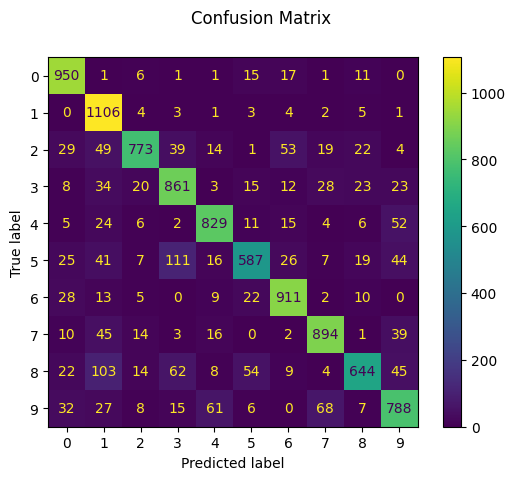

In [ ]:
from sklearn import metrics
disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test, predicted)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")

plt.show()

## Save model for later re-use

Save model to google drive

In [ ]:
# set this to match your google drive path
mnist_sklearn_logistic_model_filename = '/content/notebooks/AIT500/models/mnist_sklearn_logistic_model_28x28.joblib'
joblib.dump(clf, mnist_sklearn_logistic_model_filename)

['/content/notebooks/AIT500/models/mnist_sklearn_logistic_model.joblib']

## Load model and make predictions

Load saved model from above and call `predict()` to make predictions on the test dataset

Note: We need to ensure the shape of the input data matches the same same as data used to train the model

What is the accuracy, precision, and recall?


In [ ]:
mnist_sklearn_logistic_model = joblib.load(sk_logistic_save_model_filename)

In [ ]:
prediction = mnist_sklearn_logistic_model.predict(X_test)
print(metrics.classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.85      0.95      0.89       957
           1       0.76      0.97      0.86      1096
           2       0.89      0.78      0.83      1026
           3       0.76      0.84      0.80       978
           4       0.84      0.88      0.86      1022
           5       0.84      0.66      0.74       893
           6       0.87      0.91      0.89      1002
           7       0.85      0.85      0.85      1046
           8       0.87      0.67      0.76       974
           9       0.80      0.76      0.78      1006

    accuracy                           0.83     10000
   macro avg       0.83      0.83      0.83     10000
weighted avg       0.83      0.83      0.83     10000



# Training CNN Model to Recognize 28x28 MNIST Digits with Tensorflow

[Convolutional Neural Networks (CNN)](https://developers.google.com/machine-learning/practica/image-classification/convolutional-neural-networks#introducing_convolutional_neural_networks) are a model category that provided significant improvements over its previous generation of models.  At a high level, CNNs made use of the spatial relationships between pixels to help it recognize broader patterns in an image.

References:
- https://www.kaggle.com/code/amyjang/tensorflow-mnist-cnn-tutorial
- https://colab.research.google.com/github/tensorflow/datasets/blob/master/docs/keras_example.ipynb
- https://www.kaggle.com/code/yassineghouzam/introduction-to-cnn-keras-0-997-top-6/notebook



In [ ]:
import tensorflow as tf
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import joblib # for saving model

print(tf.__version__)

2.14.0


In [ ]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


[Text(0.5, 1.0, 'Fairly even distribution from  60000 samples')]

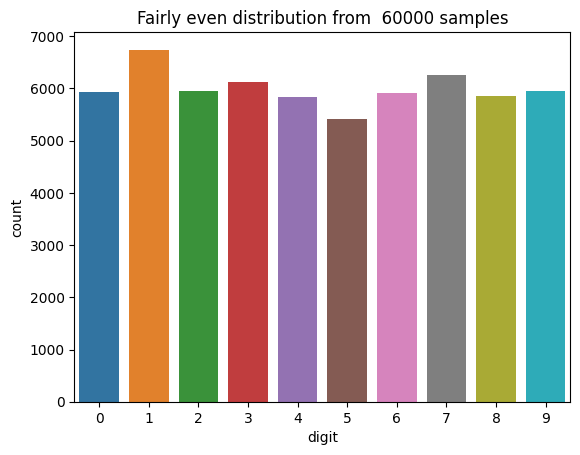

In [ ]:
df = pd.DataFrame(y_train, columns=['digit'])
g = sns.countplot(df, x='digit')
g.set(title=f'Fairly even distribution from  {y_train.shape[0]} samples')

In [ ]:
type(y_train), y_train.shape, x_train.shape

(numpy.ndarray, (60000,), (60000, 28, 28))

In [ ]:
np.isnan(x_test).any(), np.isnan(x_train).any()

(False, False)

In [ ]:
x_train.reshape(x_train.shape[0], x_train.shape[1], x_train.shape[2], 1).shape

(60000, 28, 28, 1)

In [ ]:
input_shape = (28, 28, 1)

x_train=x_train.reshape(x_train.shape[0], x_train.shape[1], x_train.shape[2], 1)
x_train=x_train / 255.0
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], x_test.shape[2], 1)
x_test=x_test/255.0

In [ ]:
y_train = tf.one_hot(y_train.astype(np.int32), depth=10)
y_test = tf.one_hot(y_test.astype(np.int32), depth=10)

tf.Tensor([0. 0. 0. 0. 1. 0. 0. 0. 0. 0.], shape=(10,), dtype=float32)


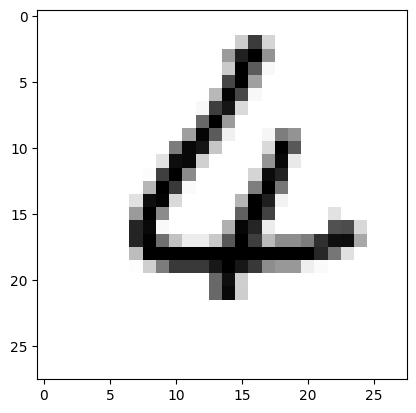

In [ ]:
SHOW_DIGIT = 850
print(y_train[SHOW_DIGIT])
_ = plt.imshow(x_train[SHOW_DIGIT][:,:,0], cmap=plt.cm.gray_r)

In [ ]:
x_train[SHOW_DIGIT][:,:,0]

array([[0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.19607843, 0.76862745, 0.16470588, 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.

## Set training parameters

In [ ]:
batch_size = 64
num_classes = 10
epochs = 5
desired_accuracy = 0.995 # can lower the accuracy to reduce training time

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (5,5), padding='same', activation='relu', input_shape=input_shape),
    tf.keras.layers.Conv2D(32, (5,5), padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Conv2D(64, (3,3), padding='same', activation='relu'),
    tf.keras.layers.Conv2D(64, (3,3), padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D(strides=(2,2)),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(num_classes, activation='softmax')
])

model.compile(optimizer=tf.keras.optimizers.RMSprop(epsilon=1e-08), loss='categorical_crossentropy', metrics=['acc'])

In [ ]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('acc')>desired_accuracy):
      print(f"\nReached {desired_accuracy} accuracy so cancelling training!")
      self.model.stop_training = True

callbacks = myCallback()

In [ ]:
%%time
# this takes ~15-30 mins to run through 5 epochs
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    validation_split=0.1,
                    callbacks=[callbacks])

Epoch 1/5
844/844 [==============================] - 211s 249ms/step - loss: 0.2267 - acc: 0.9299 - val_loss: 0.0384 - val_acc: 0.9878
Epoch 2/5
844/844 [==============================] - 221s 261ms/step - loss: 0.0760 - acc: 0.9785 - val_loss: 0.0308 - val_acc: 0.9908
Epoch 3/5
844/844 [==============================] - 226s 268ms/step - loss: 0.0564 - acc: 0.9838 - val_loss: 0.0302 - val_acc: 0.9920
Epoch 4/5
844/844 [==============================] - 208s 247ms/step - loss: 0.0482 - acc: 0.9864 - val_loss: 0.0329 - val_acc: 0.9908
Epoch 5/5
844/844 [==============================] - 229s 271ms/step - loss: 0.0452 - acc: 0.9871 - val_loss: 0.0260 - val_acc: 0.9938
CPU times: user 27min 36s, sys: 17.4 s, total: 27min 53s
Wall time: 18min 23s


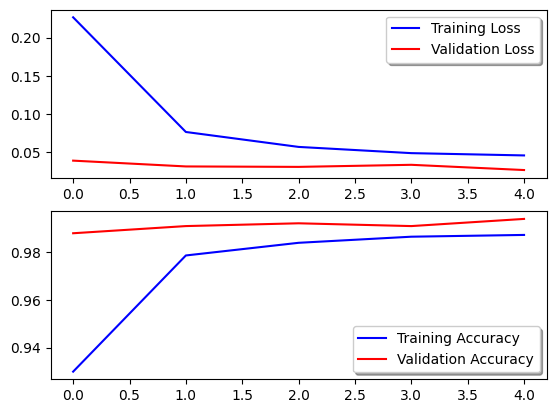

In [ ]:
#@markdown show model performance after each iteration through the dataset (ie after each epoch)

fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training Loss")
ax[0].plot(history.history['val_loss'], color='r', label="Validation Loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['acc'], color='b', label="Training Accuracy")
ax[1].plot(history.history['val_acc'], color='r',label="Validation Accuracy")
legend = ax[1].legend(loc='best', shadow=True)

## Show model performance on test dataset

In [ ]:
test_loss, test_acc = model.evaluate(x_test, y_test)

313/313 [==============================] - 16s 52ms/step - loss: 0.0194 - acc: 0.9933


In [ ]:
print(f"Loss on test dataset: {test_loss}, Accuracy on test dataset: {test_acc})")

Loss on test dataset: 0.019424138590693474, Accuracy on test dataset: 0.9933000206947327)


In [ ]:
# Predict the values from the testing dataset
Y_pred = model.predict(x_test)
# Convert predictions classes to one hot vectors
Y_pred_classes = np.argmax(Y_pred,axis = 1)
# Convert testing observations to one hot vectors
Y_true = np.argmax(y_test,axis = 1)

313/313 [==============================] - 11s 34ms/step


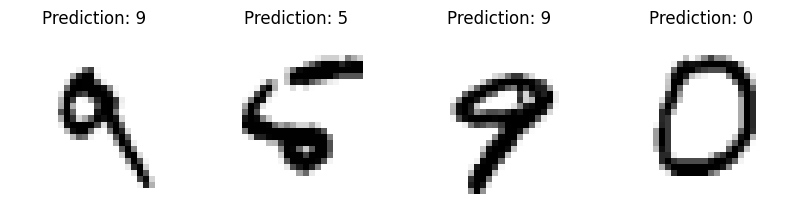

In [ ]:
# plt.imshow(X_test[0].reshape(28,28))
START_IDX = 7
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, prediction in zip(axes, x_test[START_IDX:], Y_pred_classes[START_IDX:]):
    ax.set_axis_off()
    image = image.reshape(28, 28)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title(f"Prediction: {prediction}")

In [ ]:
#@markdown this model shows so-so accuracy of 83% on the test set
print(
    f"Classification report for classifier {clf}:\n"
    f"{metrics.classification_report(Y_true, Y_pred_classes)}\n"
)

Classification report for classifier SVC(gamma=0.001):
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      1.00      1.00      1135
           2       1.00      0.99      0.99      1032
           3       0.99      1.00      0.99      1010
           4       0.99      1.00      1.00       982
           5       0.99      0.99      0.99       892
           6       0.99      0.99      0.99       958
           7       0.98      0.99      0.99      1028
           8       1.00      0.99      0.99       974
           9       0.99      0.99      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000




## Show Confusion Matrix

- You can see the CNN model performs quite well.  There are roughly 1000 samples of each digit in the test set and only a handful of incorrect predictions in the off-diagonal


Confusion matrix:
[[ 974    0    0    0    0    0    4    1    1    0]
 [   0 1130    0    2    0    0    0    3    0    0]
 [   0    1 1023    2    0    0    0    6    0    0]
 [   0    0    0 1006    0    3    0    1    0    0]
 [   0    0    0    0  979    0    0    0    0    3]
 [   0    0    0    3    0  886    1    1    0    1]
 [   3    2    0    0    1    0  951    0    1    0]
 [   0    3    1    0    0    0    0 1022    1    1]
 [   1    0    1    0    1    2    0    1  966    2]
 [   1    0    0    3    4    1    0    3    1  996]]


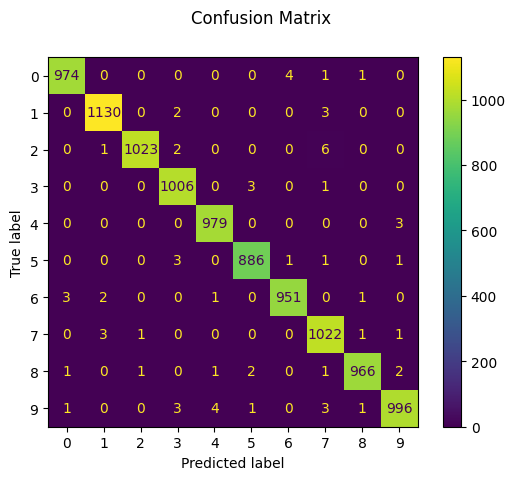

In [ ]:
from sklearn import metrics
disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test_classes, Y_pred_classes)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")

plt.show()

## Save model for later re-use

Save model to google drive

In [ ]:
# set this to match your google drive path
tf_cnn_model_filename = '/content/notebooks/AIT500/models/mnist_tf_cnn_model_28x28'
model.save(tf_cnn_model_filename)

## Load model and make predictions

Load saved model from above and call `predict()` to make predictions on the test dataset

Note: We need to ensure the shape of the input data matches the same same as data used to train the model

What is the accuracy, precision, and recall?


In [ ]:
 tf_cnn_model = tf.keras.models.load_model(tf_cnn_model_filename)

1/1 [==============================] - 0s 24ms/step


Text(0.5, 1.0, 'Prediction: 5')

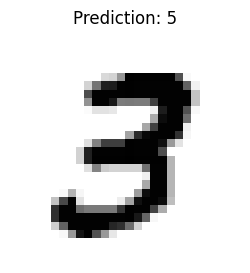

In [ ]:
SAMPLE_INDEX = 7
label_digit = y_train[SAMPLE_INDEX]
sample_digit = x_train[SAMPLE_INDEX,::]
sample_digit = sample_digit[np.newaxis,::]

predicted_digit = np.argmax(tf_cnn_model.predict(sample_digit), axis=1).item()

_, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 3))
ax.set_axis_off()
image = sample_digit.squeeze()
ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
ax.set_title(f"Prediction: {predicted_digit}")

## Convert TF model to TFLite model

In [ ]:
tf_cnn_model_filename = '/content/notebooks/AIT500/Lab6/models/mnist_tf_cnn_model_28x28'
tf_cnn_model = tf.keras.models.load_model(tf_cnn_model_filename)

In [ ]:
tflite_cnn_model_filename = '/content/notebooks/AIT500/Lab6/models/mnist_tf_cnn_model_28x28.tflite'

converter = tf.lite.TFLiteConverter.from_keras_model(tf_cnn_model)
tflite_model = converter.convert()

with open(tflite_cnn_model_filename, 'wb') as f:
    f.write(tflite_model)

# End

In [ ]:
bb